# depth = 8

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error

In [2]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/pu9kbeSaAtRZ7RxdJKX9_A/yellow-tripdata.csv'
raw_data = pd.read_csv(url)
raw_data

VendorID  passenger_count  trip_distance  RatecodeID  \
0             2                1          17.63           2   
1             2                1          19.52           2   
2             2                1          17.81           2   
3             2                2          19.30           2   
4             2                1          18.75           2   
...         ...              ...            ...         ...   
41197         2                1          16.94           2   
41198         2                4          19.83           2   
41199         2                1          17.31           2   
41200         2                1          17.28           2   
41201         2                1          16.82           2   

       store_and_fwd_flag  PULocationID  DOLocationID  payment_type  \
0                       1           132           164             1   
1                       1           132           236             1   
2                       1           132            48             1   
3                       1           132           148             1   
4                       1           132           234             1   
...                   ...           ...           ...           ...   
41197                   1           132           164             1   
41198                   1           132           166             1   
41199                   1           132           137             1   
41200                   1           132           233             1   
41201                   1           132           170             1   

       fare_amount  mta_tax  tolls_amount  improvement_surcharge  tip_amount  
0             70.0      0.5          6.94                      1       16.54  
1             70.0      0.5          6.94                      1       16.19  
2             70.0      0.5          6.94                      1       12.00  
3             70.0      0.5          0.00                      1        5.00  
4             70.0      0.5          6.94                      1       10.00  
...            ...      ...           ...                    ...         ...  
41197         70.0      0.5          6.94                      1        5.00  
41198         70.0      0.5          6.94                      1        8.00  
41199         70.0      0.5          6.94                      1        8.00  
41200         70.0      0.5          6.94                      1       16.19  
41201         70.0      0.5          6.94                      1        4.13  

[41202 rows x 13 columns]

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41202 entries, 0 to 41201
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               41202 non-null  int64  
 1   passenger_count        41202 non-null  int64  
 2   trip_distance          41202 non-null  float64
 3   RatecodeID             41202 non-null  int64  
 4   store_and_fwd_flag     41202 non-null  int64  
 5   PULocationID           41202 non-null  int64  
 6   DOLocationID           41202 non-null  int64  
 7   payment_type           41202 non-null  int64  
 8   fare_amount            41202 non-null  float64
 9   mta_tax                41202 non-null  float64
 10  tolls_amount           41202 non-null  float64
 11  improvement_surcharge  41202 non-null  int64  
 12  tip_amount             41202 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 4.1 MB


In [3]:
correlation_values = raw_data.corr()['tip_amount'].drop('tip_amount')
correlation_values

VendorID                      NaN
passenger_count          0.015081
trip_distance            0.101819
RatecodeID               0.094075
store_and_fwd_flag       0.000320
PULocationID            -0.023086
DOLocationID             0.024348
payment_type                  NaN
fare_amount              0.200638
mta_tax                 -0.054488
tolls_amount             0.116172
improvement_surcharge   -0.000727
Name: tip_amount, dtype: float64

<Axes: >

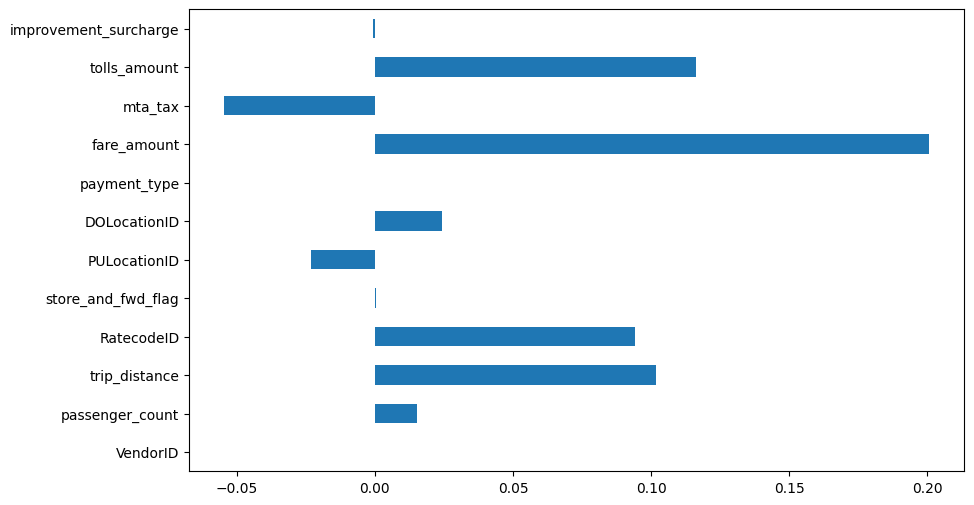

In [4]:
correlation_values.plot(kind='barh', figsize=(10, 6))

In [6]:
y = raw_data[['tip_amount']].values.astype('float32')
proc_data = raw_data.drop(['tip_amount'], axis=1)
X = proc_data.values
X = normalize(X, axis=1, norm='l1', copy=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(criterion = 'squared_error', max_depth=8, random_state=35)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=35)

In [9]:
# run inference using the sklearn model
y_pred = dt_reg.predict(X_test)

# evaluate mean squared error on the test dataset
mse_score = mean_squared_error(y_test, y_pred)
print('MSE score : {0:.3f}'.format(mse_score))

r2_score = dt_reg.score(X_test,y_test)
print('R^2 score : {0:.3f}'.format(r2_score))

MSE score : 24.555
R^2 score : 0.028


In [10]:
y_pred # prediction

array([14.43893014, 13.47723817, 16.36184052, ..., 14.43893014,
       14.43893014, 13.47723817])

In [11]:
y_test # thuc te

array([[16.19],
       [14.8 ],
       [19.49],
       ...,
       [16.54],
       [13.23],
       [15.15]], dtype=float32)

In [15]:
comparison_df = pd.DataFrame({
    'Actual': y_test.reshape(-1), # Chuyển y_test từ mảng 2D (Nx1) sang 1D (N,)
    'Predicted': y_pred
})
comparison_df.head()

Actual  Predicted
0  16.190001  14.438930
1  14.800000  13.477238
2  19.490000  16.361841
3  16.190001  14.438930
4  10.000000  14.438930

R^2 score : 0.028 -> Badddd

# depth = 4 & remove some features

In [17]:
raw_data.head(2)

VendorID  passenger_count  trip_distance  RatecodeID  store_and_fwd_flag  \
0         2                1          17.63           2                   1   
1         2                1          19.52           2                   1   

   PULocationID  DOLocationID  payment_type  fare_amount  mta_tax  \
0           132           164             1         70.0      0.5   
1           132           236             1         70.0      0.5   

   tolls_amount  improvement_surcharge  tip_amount  
0          6.94                      1       16.54  
1          6.94                      1       16.19

In [18]:
raw_data.corr()['tip_amount']

VendorID                      NaN
passenger_count          0.015081
trip_distance            0.101819
RatecodeID               0.094075
store_and_fwd_flag       0.000320
PULocationID            -0.023086
DOLocationID             0.024348
payment_type                  NaN
fare_amount              0.200638
mta_tax                 -0.054488
tolls_amount             0.116172
improvement_surcharge   -0.000727
tip_amount               1.000000
Name: tip_amount, dtype: float64

In [22]:
# `payment_type`, `VendorID`, `store_and_fwd_flag` and `improvement_surcharge` - no correlation with tip_amount
raw_data2 = raw_data.drop(['payment_type', 'VendorID', 'store_and_fwd_flag', 'improvement_surcharge'], axis=1)
y2 = raw_data2[['tip_amount']].values.astype('float32')
proc_data2 = raw_data2.drop(['tip_amount'], axis=1)
X2 = proc_data2.values
X2 = normalize(X2, axis=1, norm='l1', copy=False)

In [24]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)
dt_reg2 = DecisionTreeRegressor(criterion = 'squared_error', max_depth=4, random_state=35)
dt_reg2.fit(X_train2, y_train2)
y_pred2 = dt_reg2.predict(X_test2)

mse_score2 = mean_squared_error(y_test2, y_pred2)
print('MSE score : {0:.3f}'.format(mse_score2))

r2_score2 = dt_reg2.score(X_test2,y_test2)
print('R^2 score : {0:.3f}'.format(r2_score2))

MSE score : 24.468
R^2 score : 0.031


R^2 score : 0.031 > 0.028 -> better

In [28]:
# test remove more
raw_data3 = raw_data.drop(['payment_type', 'VendorID', 'mta_tax', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'improvement_surcharge'], axis=1)
raw_data3.corr()['tip_amount']

passenger_count    0.015081
trip_distance      0.101819
RatecodeID         0.094075
fare_amount        0.200638
tolls_amount       0.116172
tip_amount         1.000000
Name: tip_amount, dtype: float64

In [46]:
y3 = raw_data3[['tip_amount']].values.astype('float32')
proc_data3 = raw_data3.drop(['tip_amount'], axis=1)
X3 = proc_data3.values
X3 = normalize(X3, axis=1, norm='l1', copy=False)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=42)
dt_reg3 = DecisionTreeRegressor(criterion = 'squared_error', max_depth=4, random_state=35)
dt_reg3.fit(X_train3, y_train3)
y_pred3 = dt_reg3.predict(X_test3)

mse_score3 = mean_squared_error(y_test3, y_pred3)
print('MSE score : {0:.3f}'.format(mse_score3))

r2_score3 = dt_reg3.score(X_test3,y_test3)
print('R^2 score : {0:.3f}'.format(r2_score3))

MSE score : 24.589
R^2 score : 0.027
